**T074 Kermeen**

**Prac 10**

**Data Visualization and Storytelling**

*  Create meaningful visualizations using data visualization tools
*  Combine multiple visualizations to tell a compelling data story.
*  Present the findings and insights in a clear and concise manner.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("/content/Sales_with_NaNs_v1.3.csv")
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [16]:
df.isnull().sum()

,0
Group,1401
Customer_Segment,1966
Sales_Before,1522
Sales_After,767
Customer_Satisfaction_Before,1670
Customer_Satisfaction_After,1640
Purchase_Made,805
satisfied,0


In [19]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numerical columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


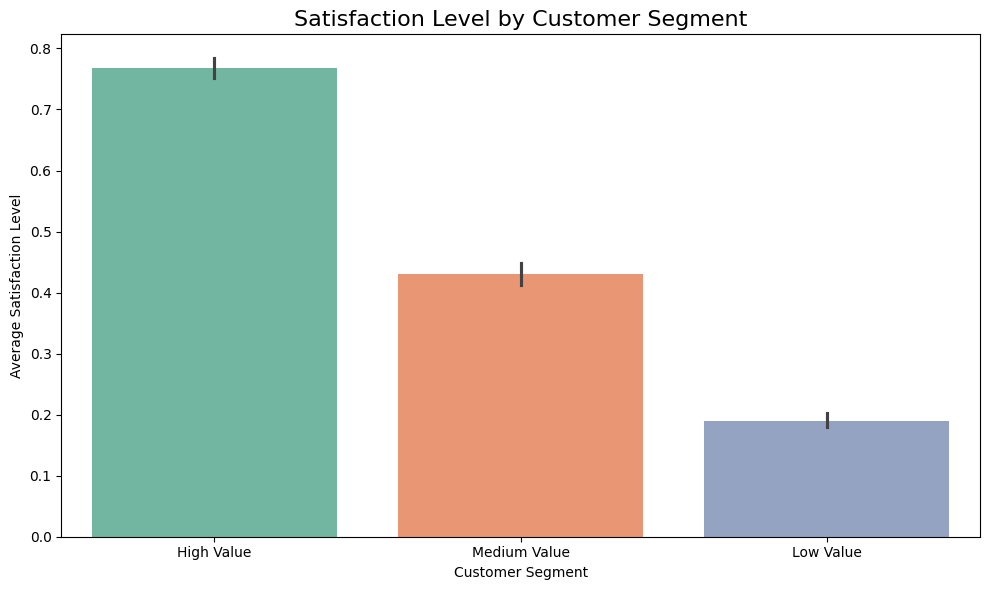

In [23]:
#Satisfaction by Customer Segment
plt.figure(figsize=(10, 6))
sns.barplot(x="Customer_Segment", y="satisfied", data=df, palette="Set2", hue="Customer_Segment", legend=False)
plt.title("Satisfaction Level by Customer Segment", fontsize=16)
plt.xlabel("Customer Segment")
plt.ylabel("Average Satisfaction Level")
plt.tight_layout()
plt.show()

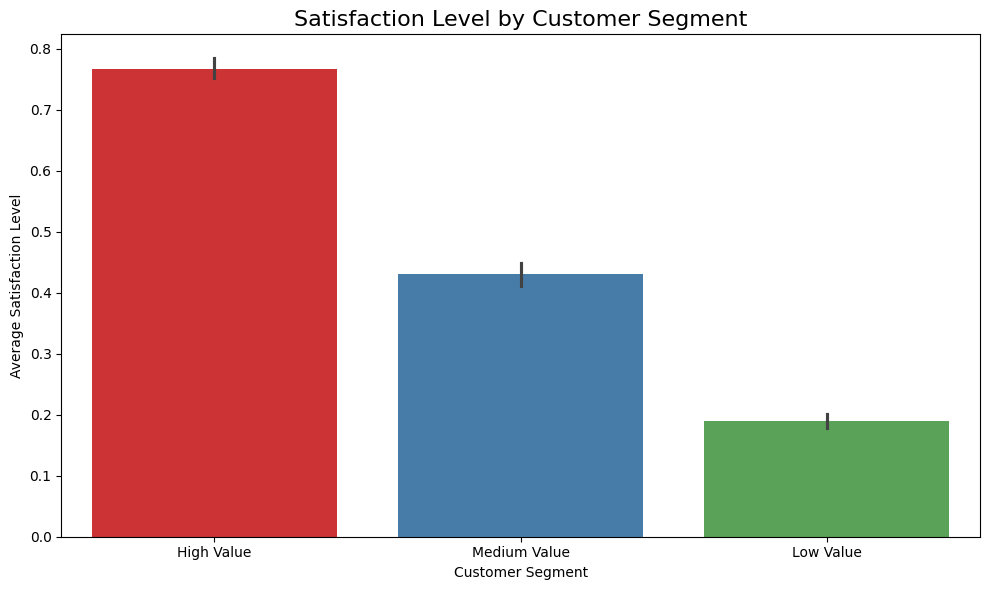

In [24]:
#Satisfaction by Customer Segment
plt.figure(figsize=(10, 6))
sns.barplot(x="Customer_Segment", y="satisfied", data=df, palette="Set1", hue="Customer_Segment", legend=False)
plt.title("Satisfaction Level by Customer Segment", fontsize=16)
plt.xlabel("Customer Segment")
plt.ylabel("Average Satisfaction Level")
plt.tight_layout()
plt.show()

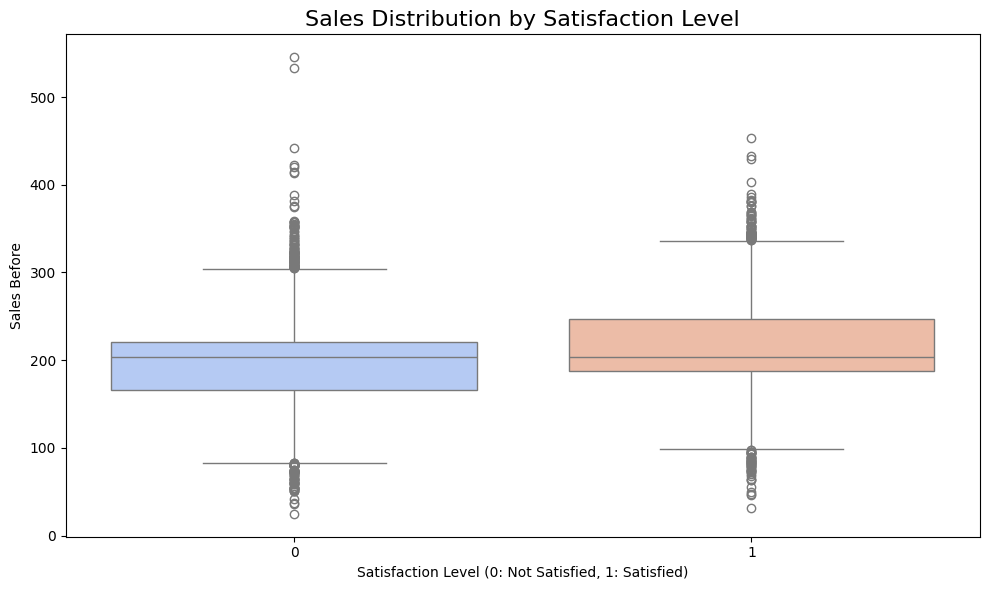

In [28]:
#Sales Distribution vs Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x="satisfied", y="Sales_Before", data=df, palette="coolwarm", hue="satisfied", legend=False)
plt.title("Sales Distribution by Satisfaction Level", fontsize=16)
plt.xlabel("Satisfaction Level (0: Not Satisfied, 1: Satisfied)")
plt.ylabel("Sales Before")
plt.tight_layout()
plt.show()

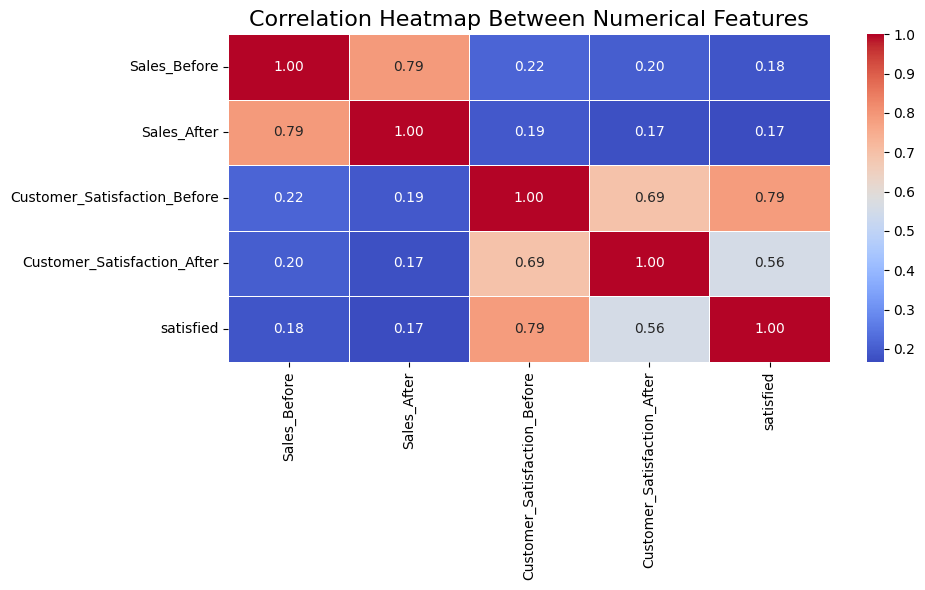

In [29]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
numerical_cols_for_corr = ['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'satisfied']
correlation_matrix = df[numerical_cols_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Between Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

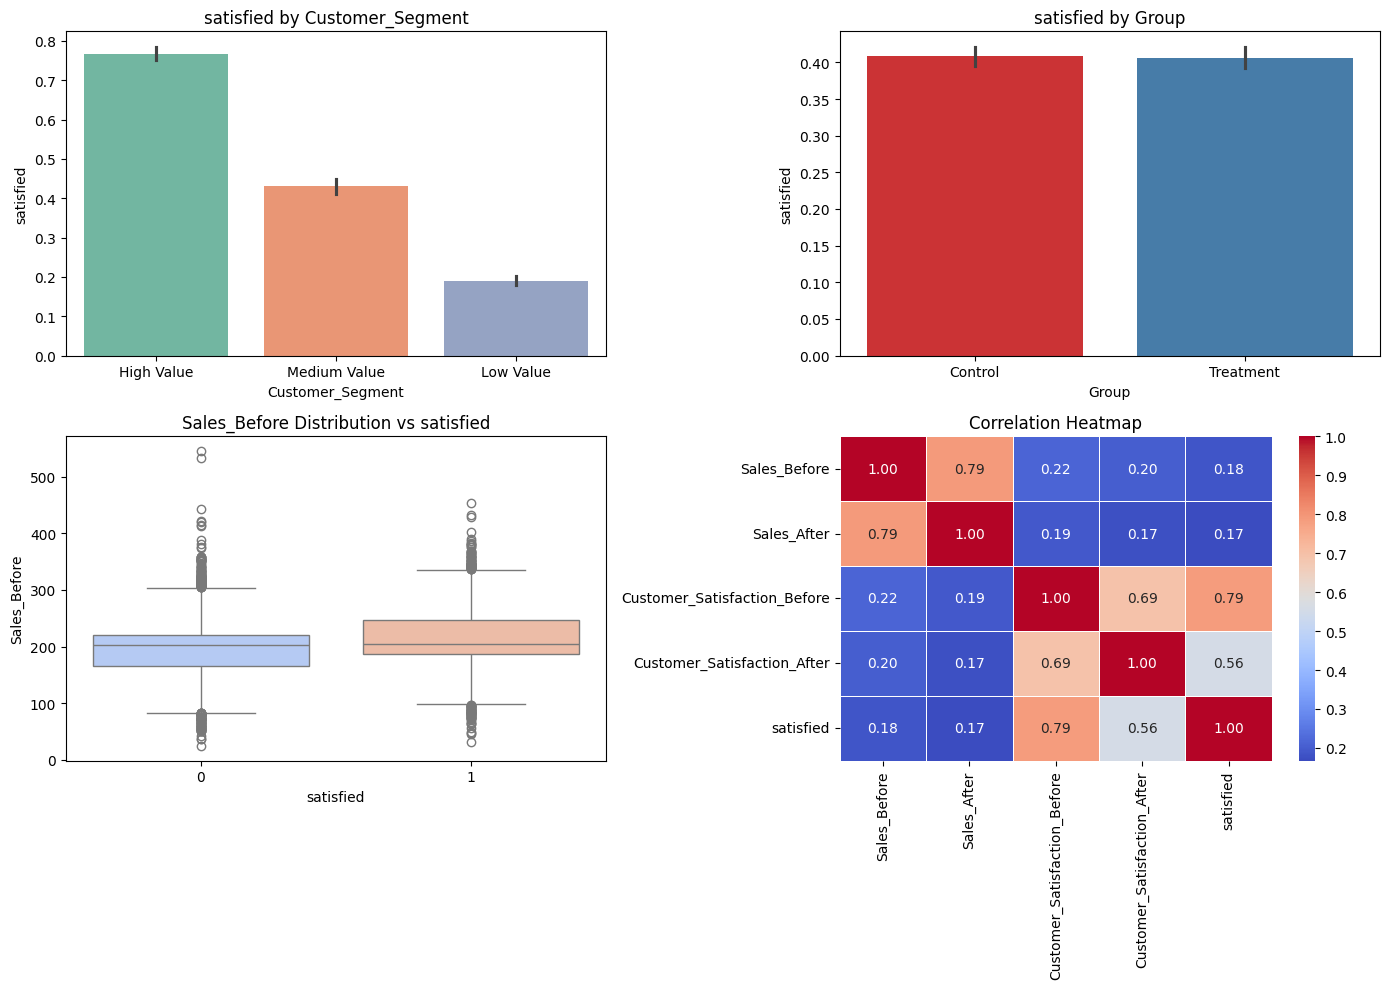

In [31]:
col_class = "Customer_Segment"
col_gender = "Group"
col_target = "satisfied"
col_age_proxy = "Sales_Before"

# For correlation heatmap
numerical_cols_for_corr = ['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After', 'satisfied']
correlation_matrix = df[numerical_cols_for_corr].corr()


# Combined Visualizations for Storytelling
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Rate by Customer Segment
sns.barplot(x=col_class, y=col_target, data=df, palette="Set2", hue=col_class, legend=False, ax=axes[0, 0])
axes[0, 0].set_title(f"{col_target} by {col_class}", fontsize=12)
axes[0, 0].set_xlabel(col_class)
axes[0, 0].set_ylabel(col_target)

# Rate by Group
sns.barplot(x=col_gender, y=col_target, data=df, palette="Set1", hue=col_gender, legend=False, ax=axes[0, 1])
axes[0, 1].set_title(f"{col_target} by {col_gender}", fontsize=12)
axes[0, 1].set_xlabel(col_gender)
axes[0, 1].set_ylabel(col_target)

# Sales Before Distribution vs Target
sns.boxplot(x=col_target, y=col_age_proxy, data=df, palette="coolwarm", hue=col_target, legend=False, ax=axes[1, 0])
axes[1, 0].set_title(f"{col_age_proxy} Distribution vs {col_target}", fontsize=12)
axes[1, 0].set_xlabel(col_target)
axes[1, 0].set_ylabel(col_age_proxy)

# Correlation Heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    ax=axes[1, 1])
axes[1, 1].set_title("Correlation Heatmap", fontsize=12)

plt.tight_layout()
plt.show()